## Lab5 Intro (Finetune Titan model in bedrock)
- This Lab will demonstrate how we use our own train data to improve the performance of Model by using the custom model feature in Bedrock
- This is a reading session for you in this event, due to the limitation of the experiment, but you can still run it in your own AWS account
- We will use train data and validation data (about 10% of train dataset). The data files are  `data/sft_train.jsonl` and `data/stf_val.jsonl`.  
The dataset is prepared in jsonl format as :
```json
[{"system": "<system message>","messages":[{"role": "user", "content": "<user query>"},{"role": "assistant", "content": "<expected generated text>"}]}]
```

```json
{"prompt": "<prompt1>", "completion": "<expected generated text>"}
{"prompt": "<prompt2>", "completion": "<expected generated text>"}
{"prompt": "<prompt3>", "completion": "<expected generated text>"} 
```


### Preview the train data

In [ ]:
import os
import json

def read_jsonl(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            try:
                item = json.loads(line.strip())
                data.append(item)
            except json.JSONDecodeError:
                print(f"Skipping invalid JSON: {line}")
    return data



train_data = read_jsonl('data/sft_train.jsonl')

In [ ]:
train_data[:2]

### Upload train and validation data to s3 

In [ ]:
bucket = <input a s3 bucket>

In [ ]:
!aws s3 cp ./data/sft_train2.jsonl s3://{default_bucket}/dataset-for-training/bedrock/
!aws s3 cp ./data/sft_val2.jsonl s3://{default_bucket}/dataset-for-training/bedrock/

### Create bedrock custom model job in Bedrock console

#### 1. Visit Bedrock console, Click `custom models` in the left navigation bar.  
click create fine-tuning job
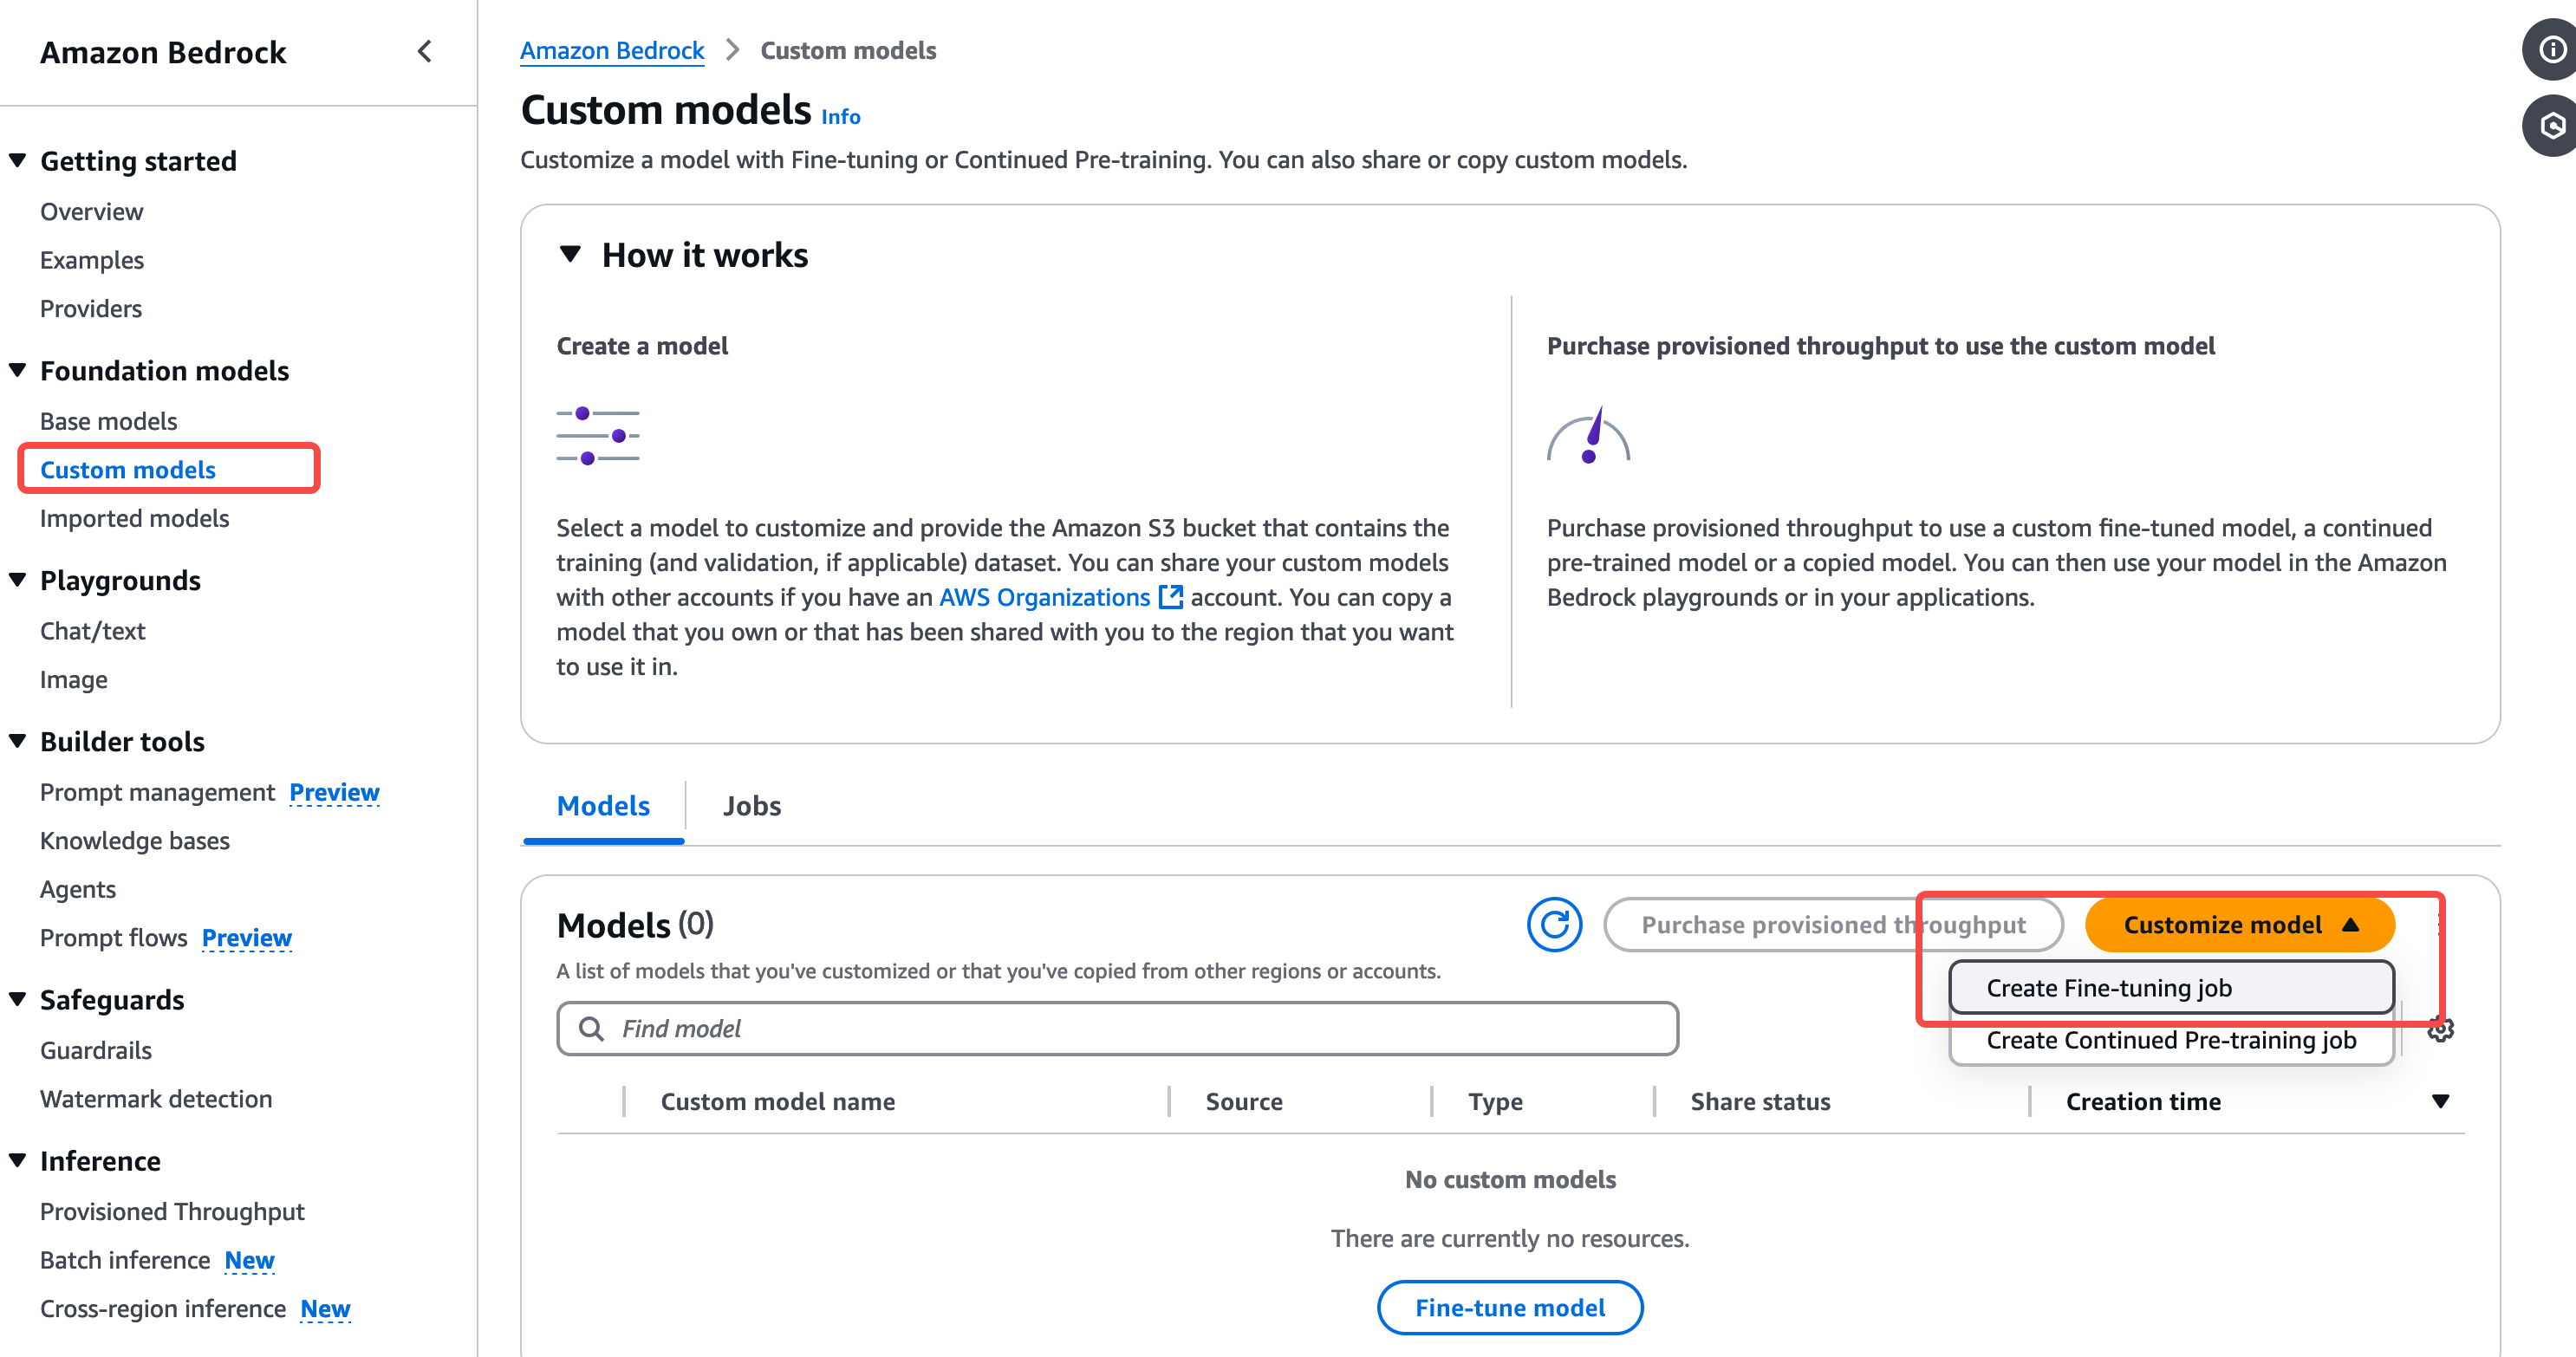

#### 2. Select Titan Express model to fine-tuning
You can fill a new model name, a job name, and input the s3 data url for train data and validation data which uploaded in previous step
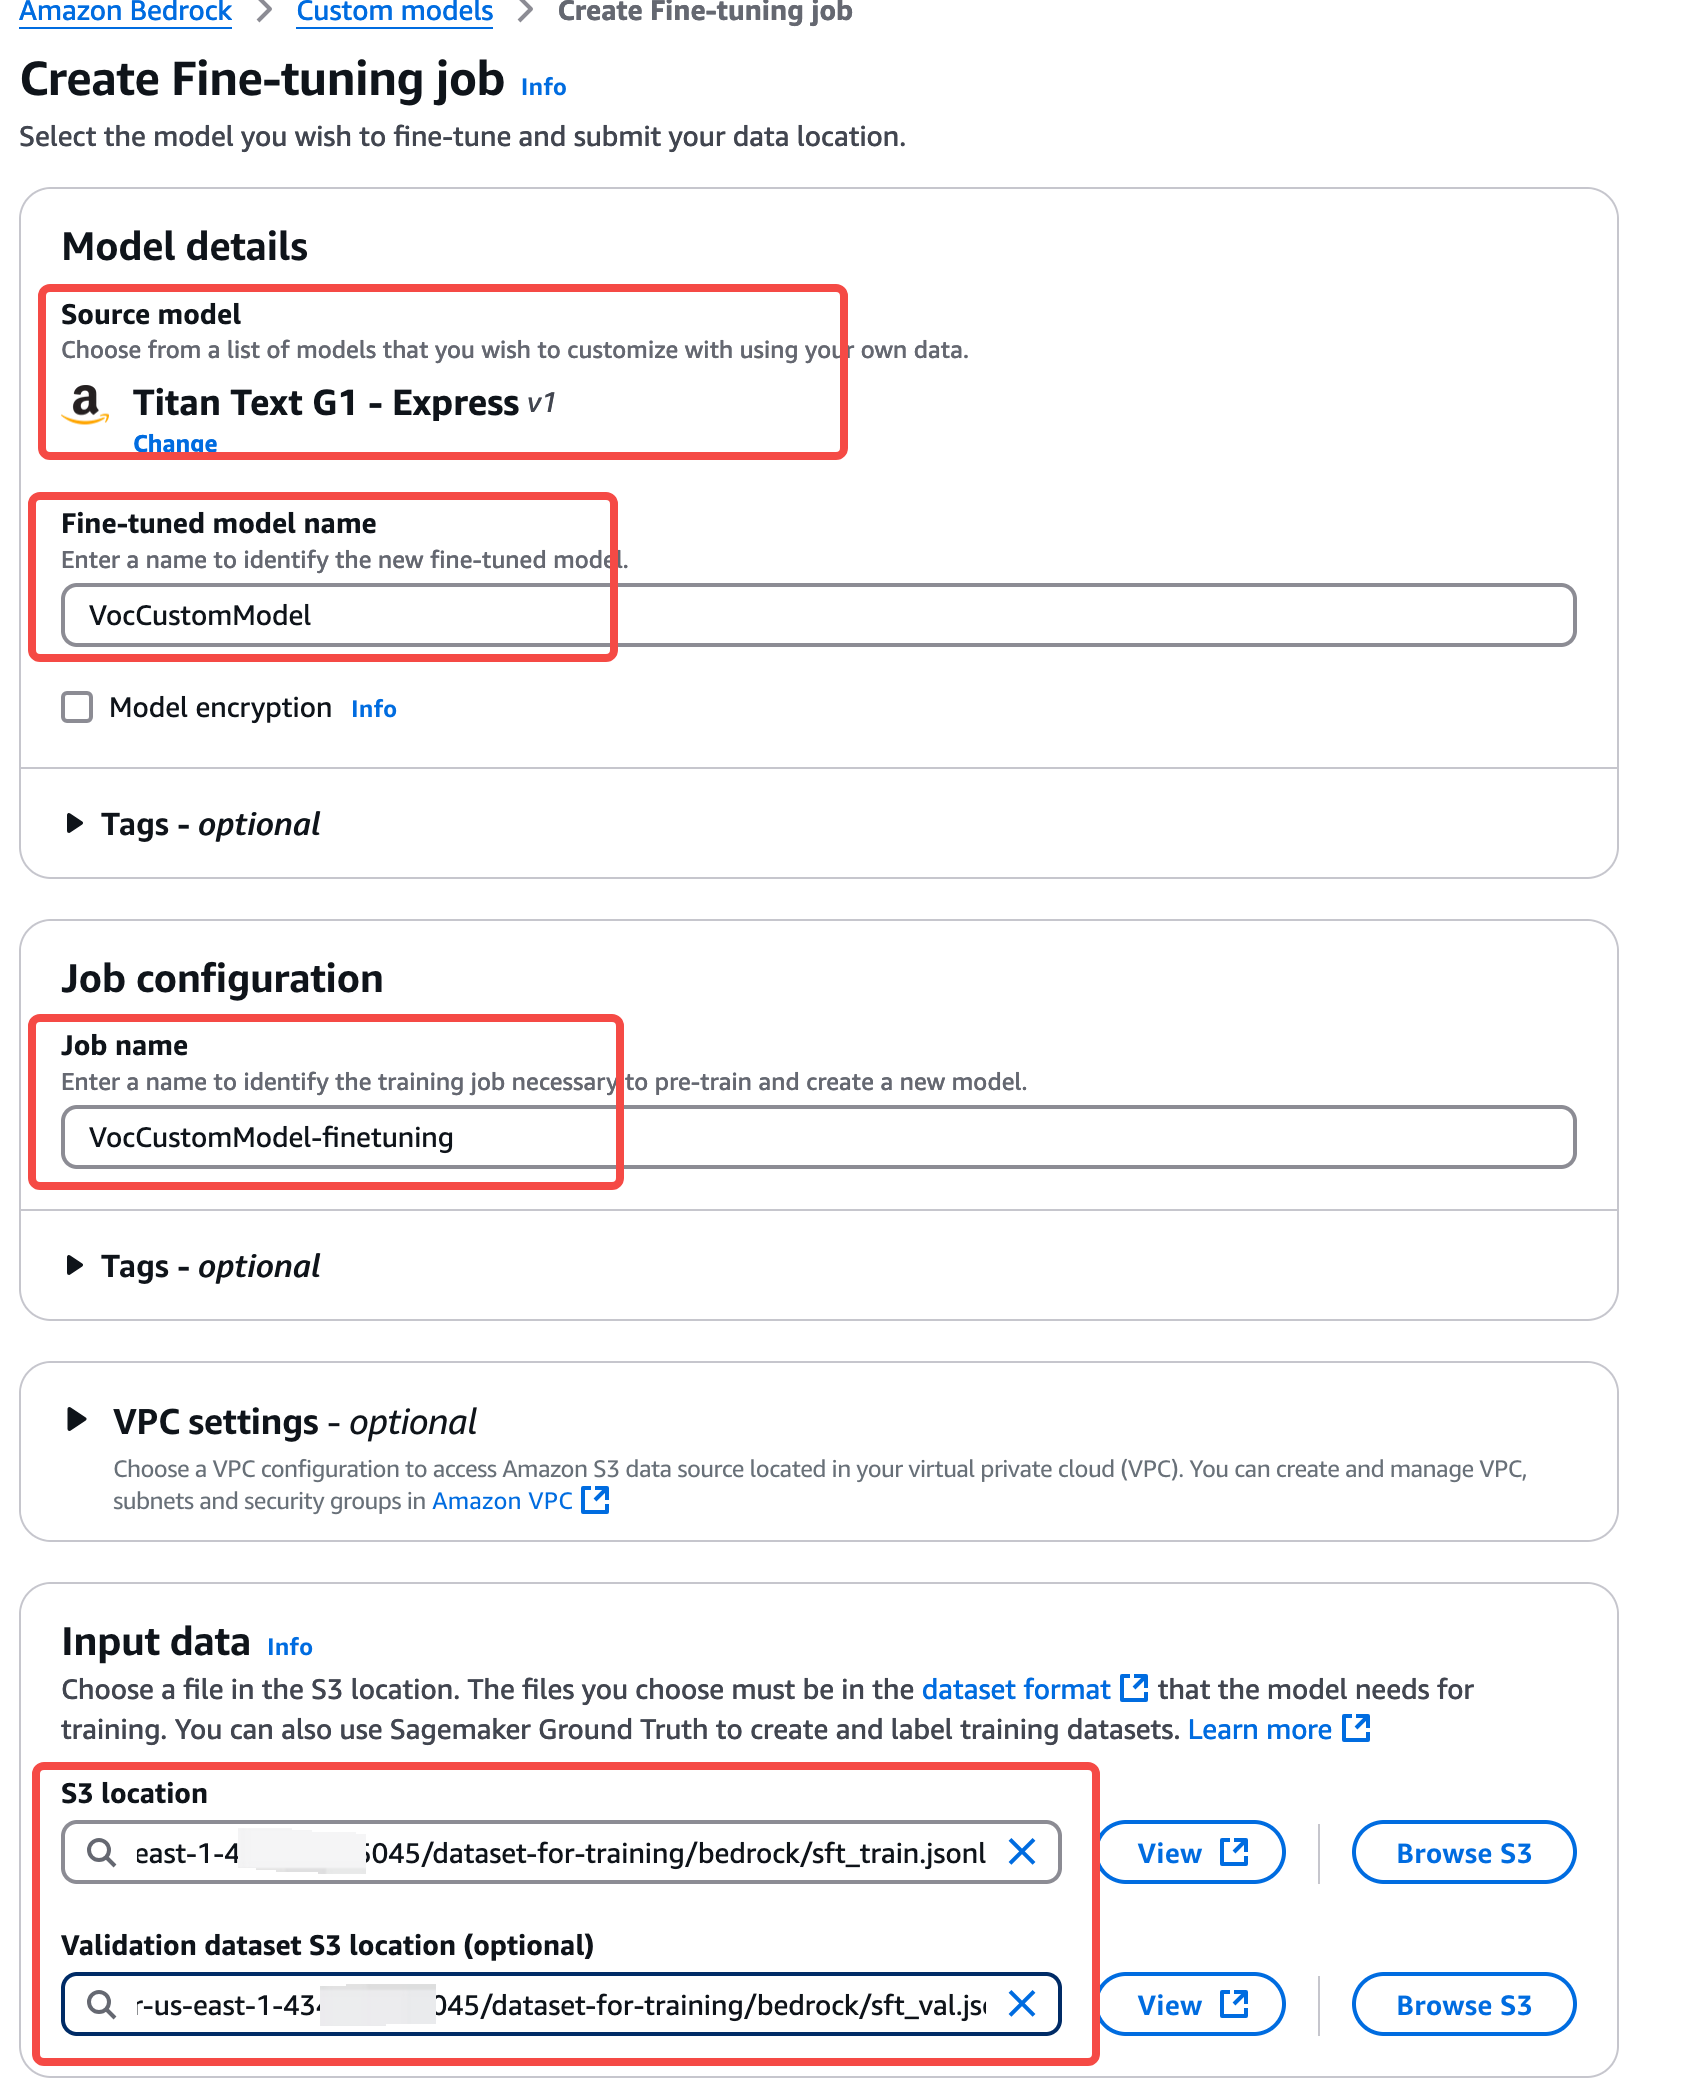

#### 3. We will use the hyper paramters as shown in below screen shot and fill a s3 folder for validation outputs
- And create a new role for this job
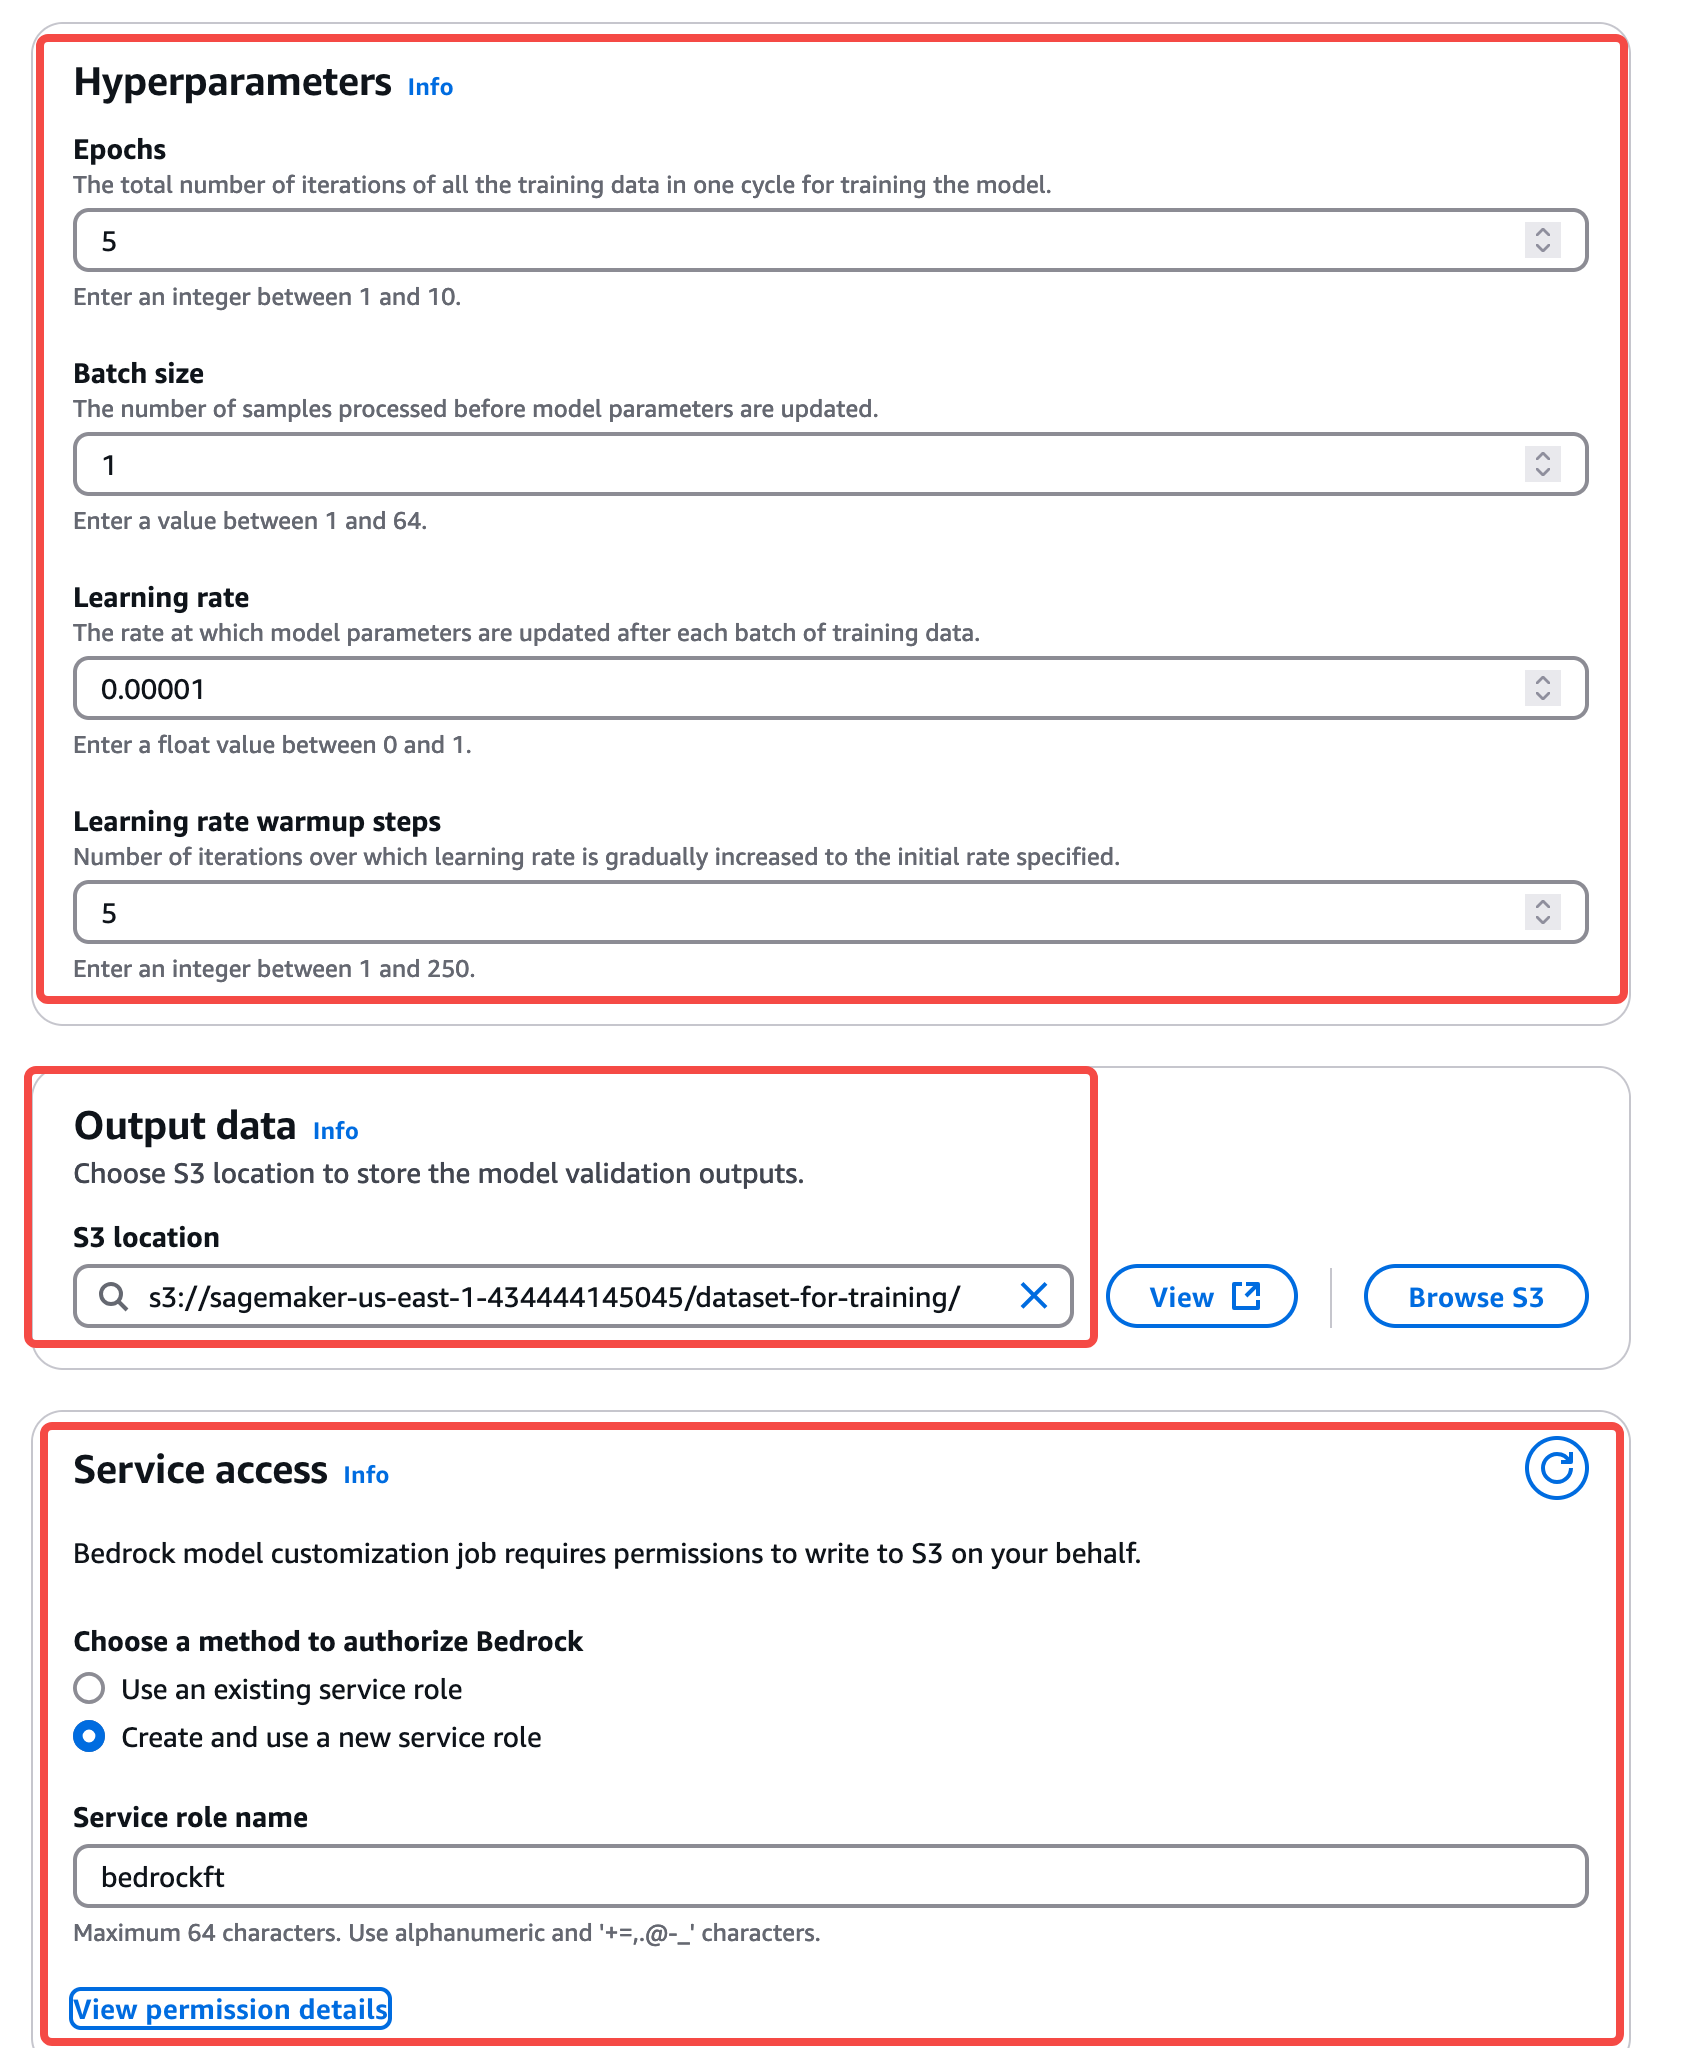

#### 4. Click `Create a fine-tuning job` to start the job
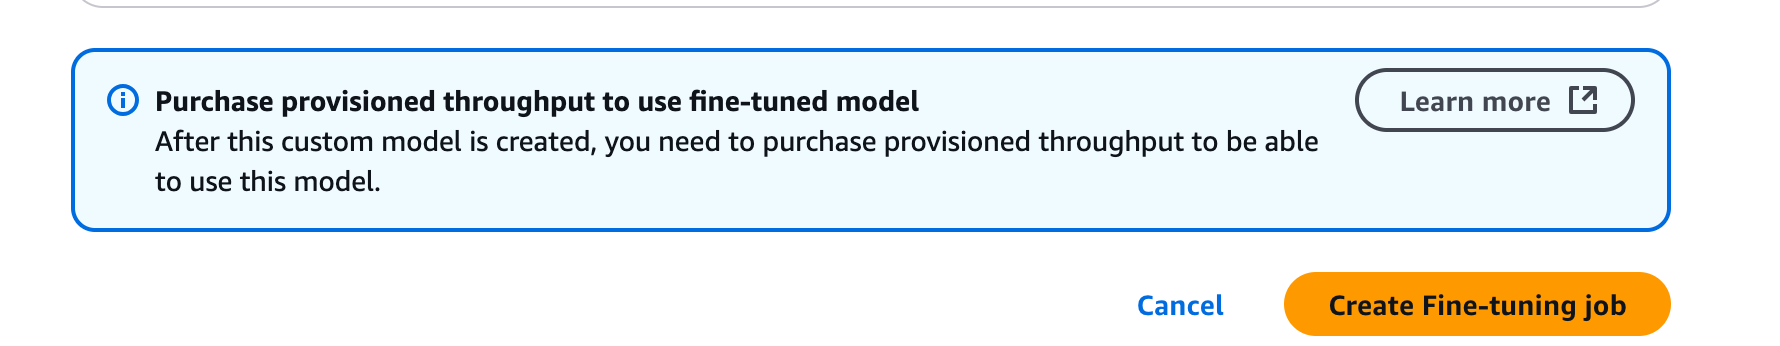

#### 5. Please notice that after this custom model is created, you need to purchase provisioned throughput to be able to use this model.